## Initialization

In [1]:
from math import *
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd

In [2]:
# panda display options
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 11)
pd.set_option('display.float_format', '{:.6e}'.format)

## Test with .csv

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [3]:
c=1
# files to run
files=['pi+frompi++Cinteractions','pi-frompi++Cinteractions', 'K+frompi++Cinteractions', 'K-frompi++Cinteractions', 'protonsfrompi++Cinteractions', 'K0Sfrompi++Cinteractions', 'Lambdafrompi++Cinteractions', 'Anti-Lambdafrompi++Cinteractions']

# tables header
header=['momentum [GeV/c]','momentum [GeV/c] LOW','momentum [GeV/c] HIGH','theta [rad.]','theta [rad.] LOW','theta [rad.] HIGH','multiplicity [1/(rad. GeV/c)]','sys. unc. +','sys. unc. -','stat. unc. +','stat. unc. -']

# extract the tables from individual .csv files
# skipping the first 5 lines (not tables yet)
# using knowledge from line 5 of the .csv file as a header for the columns names
dfc = pd.read_csv('NA61SHINE_2019_I1754136_csv/'+files[c-1]+'.csv', skiprows=5, names=header)
#display(dfc)

In [4]:
# sort the dataframe by theta ranges, then ascending in momentum
dfc = dfc.sort_values(by = ['theta [rad.]', 'momentum [GeV/c]'])
#display(dfc)
# re-index the dataframe
dfc = dfc.reset_index(drop=True)
#display(dfc)

In [5]:
# print the ErrorBreakdown separated for each theta ranges
a=2
d=0
print('d0%i-x01-y01'%c)
# going through all the rows of the table
for i in dfc.index:
    # if we change theta range
    print(d,': {stat: {dn:', dfc.loc[i, 'stat. unc. -'], ', up:', dfc.loc[i, 'stat. unc. +'],
          '}, sys: {dn:', dfc.loc[i, 'sys. unc. -'], ', up:', dfc.loc[i, 'sys. unc. +'], '}},')
    d=d+1
    if (i < len(dfc.index)-1):
        if (dfc.loc[i, 'theta [rad.]'] != dfc.loc[i+1, 'theta [rad.]']):
        # keeps track of subtables
            print('d0%i-x01-y0%i'%(c,a))
            a=a+1
            d=0

d08-x01-y01
0 : {stat: {dn: -0.00049462 , up: 0.00049462 }, sys: {dn: -0.0018671 , up: 0.0010668 }},
1 : {stat: {dn: -0.00058103 , up: 0.00058103 }, sys: {dn: -0.0012667 , up: 0.0018959 }},
d08-x01-y02
0 : {stat: {dn: -0.00097101 , up: 0.00097101 }, sys: {dn: -0.0048786 , up: 0.0019781 }},
1 : {stat: {dn: -0.00066162 , up: 0.00066162 }, sys: {dn: -0.0016773 , up: 0.0027041 }},
d08-x01-y03
0 : {stat: {dn: -0.0011155 , up: 0.0011155 }, sys: {dn: -0.0046867 , up: 0.0022093 }},
1 : {stat: {dn: -0.0006925 , up: 0.0006925 }, sys: {dn: -0.0014193 , up: 0.0012498 }},
d08-x01-y04
0 : {stat: {dn: -0.0010093 , up: 0.0010093 }, sys: {dn: -0.0056639 , up: 0.0019265 }},
1 : {stat: {dn: -0.00053733 , up: 0.00053733 }, sys: {dn: -0.0014669 , up: 0.0010853 }},
d08-x01-y05
0 : {stat: {dn: -0.00046003 , up: 0.00046003 }, sys: {dn: -0.0016841 , up: 0.00079251 }},
d08-x01-y06
0 : {stat: {dn: -0.0005655 , up: 0.0005655 }, sys: {dn: -0.0015635 , up: 0.00099742 }},
d08-x01-y07
0 : {stat: {dn: -0.00037003 , up

In [6]:
dfct = dfc[['momentum [GeV/c]','momentum [GeV/c] LOW','momentum [GeV/c] HIGH','multiplicity [1/(rad. GeV/c)]']].copy()

Calculate the total error bars by merging together statistic and systematic errors for both upper and lower contributions. following: $$\Delta_{\text{tot}} = \sqrt{{\Delta_{\text{stat}}}^2 + {\Delta_{\text{sys}}}^2}$$

In [7]:
dfct.loc[:,'yerrm'] = sqrt((dfc['stat. unc. -'])**2 + (dfc['sys. unc. -'])**2)
dfct.loc[:,'yerrp'] = sqrt((dfc['stat. unc. +'])**2 + (dfc['sys. unc. +'])**2)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html

In [8]:
dfct = dfct.set_axis(['xval', 'xerrm', 'xerrp', 'yval', 'yerr-', 'yerr+'], axis=1)
#dfct = dfct.to_string(index=False)

In [9]:
dfct.loc[:,'xerr-'] = dfct['xval'] - dfct['xerrm']
dfct.loc[:,'xerr+'] = dfct['xerrp'] - dfct['xval']
dfct = dfct.drop(['xerrm', 'xerrp'], axis=1)
dfct = dfct[['xval', 'xerr-', 'xerr+', 'yval', 'yerr-', 'yerr+']]
#display(dfct)

In [10]:
dfn = dfc.apply(pd.to_numeric, errors='coerce', axis=1)

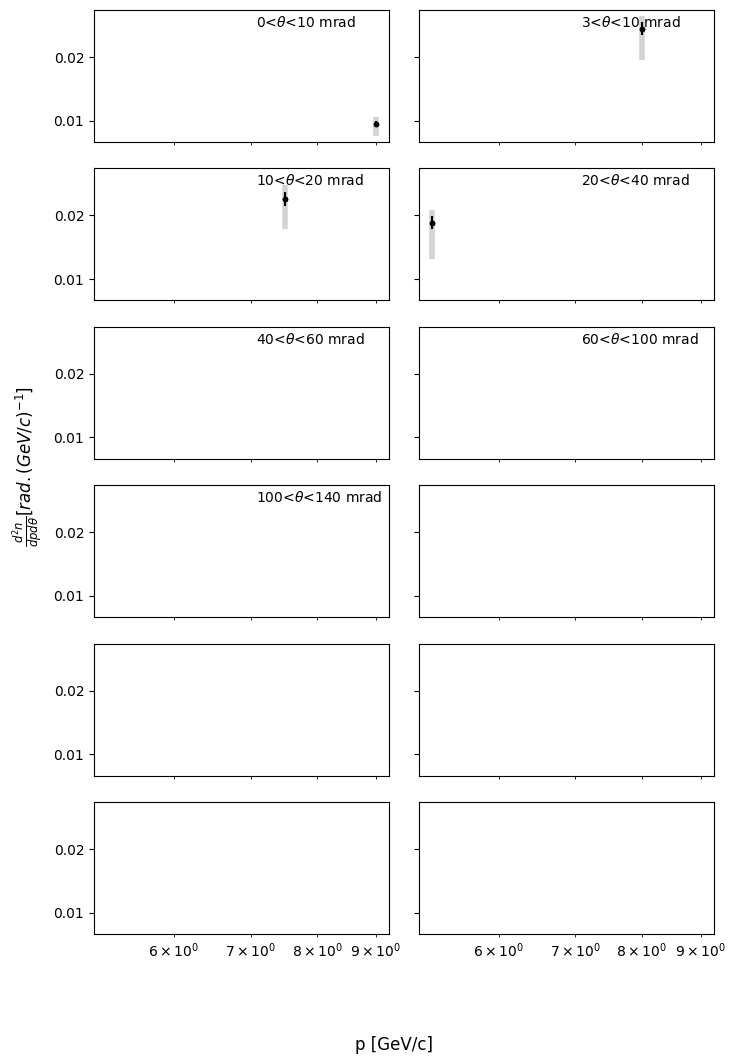

In [11]:
text=[r'0<$\theta$<10 mrad', r'3<$\theta$<10 mrad', r'10<$\theta$<20 mrad', r'20<$\theta$<40 mrad', r'40<$\theta$<60 mrad', r'60<$\theta$<100 mrad', r'100<$\theta$<140 mrad', r'140<$\theta$<180 mrad', r'180<$\theta$<240 mrad', r'240<$\theta$<300 mrad', r'300<$\theta$<360 mrad', r'360<$\theta$<420 mrad']

fig, axs  = plt.subplots(6, 2, figsize=(8,12), sharex=True, sharey=True, dpi=100)
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.supxlabel('p [GeV/c]')
fig.supylabel(r'$\frac{d^2n}{dpd\theta} [rad.{(GeV/c)}^{-1}]$')

b=1;j=0
for i in dfc.index:
        if (i<len(dfc.index)-1):
            if (dfc.loc[i, 'theta [rad.]'] != dfc.loc[i+1, 'theta [rad.]']):
                ax = plt.subplot(6,2,b)
                plt.errorbar(dfct['xval'][j:i], dfct['yval'][j:i], yerr=[-dfn['sys. unc. -'][j:i], dfn['sys. unc. +'][j:i]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
                plt.errorbar(dfct['xval'][j:i], dfct['yval'][j:i], yerr=[-dfn['stat. unc. -'][j:i], dfn['stat. unc. +'][j:i]], c='black', fmt='o', ms=3, ecolor='black')
                plt.xscale('log', base=10)
                #plt.xlim(1,50)
                #plt.ylim(0,2)
                #if (b<4):
                    #plt.ylim(0,1)
                if (b):
                    ax.text(0.55, 0.85, text[b-1], transform=ax.transAxes, fontsize=10, va='bottom')
                b=b+1;j=i+1
        if (i==len(dfc.index)-1):
            ax = plt.subplot(6,2,b)
            plt.errorbar(dfct['xval'][j:i], dfct['yval'][j:i], yerr=[-dfn['sys. unc. -'][j:i], dfn['sys. unc. +'][j:i]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
            plt.errorbar(dfct['xval'][j:i], dfct['yval'][j:i], yerr=[-dfn['stat. unc. -'][j:i], dfn['stat. unc. +'][j:i]], c='black', fmt='o', ms=3, ecolor='black')
            plt.xscale('log', base=10)
            #plt.xlim(1,50)
            #plt.ylim(0,2)
            ax.text(0.55, 0.85, text[b-1], transform=ax.transAxes, fontsize=10, va='bottom')

In [12]:
with open('NA61SHINE_2019_I1754136_'+files[c-1]+'.yoda', 'w') as f:
    a=2
    print('d0%i-x01-y01'%c, file=f)
    for i in dfc.index:
        print(dfct.loc[[i]].to_string(header=False, index=False), file=f)
        if (i<len(dfc.index)-1):
            if (dfc.loc[i, 'theta [rad.]'] != dfc.loc[i+1, 'theta [rad.]']):
                print('d0%i-x01-y0%i'%(c,a), file=f)
                a=a+1

## Test with .json

https://pandas.pydata.org/docs/reference/api/pandas.read_json.html

## Test with .yoda

Extract a dataframe (from 1 to 12) depending on the theta binning from 0 to 420 mrad, organize each dataframe in ascending 3-momentum binning from 0 to 50 GeV/c, all that keeping previous index information which will be used for the ErrorBreakdown filtering and re-organization.